<a href="https://colab.research.google.com/github/fitsum1515/time-series-forcasting/blob/main/Time_Series_Forecasting_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
df=pd.DataFrame()

In [40]:
df = pd.read_csv('/content/Alcohol_Sales.csv',index_col='DATE',parse_dates=True)
df.index.freq = 'MS'

In [41]:
df.head()

,Sales
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


<Axes: xlabel='DATE'>

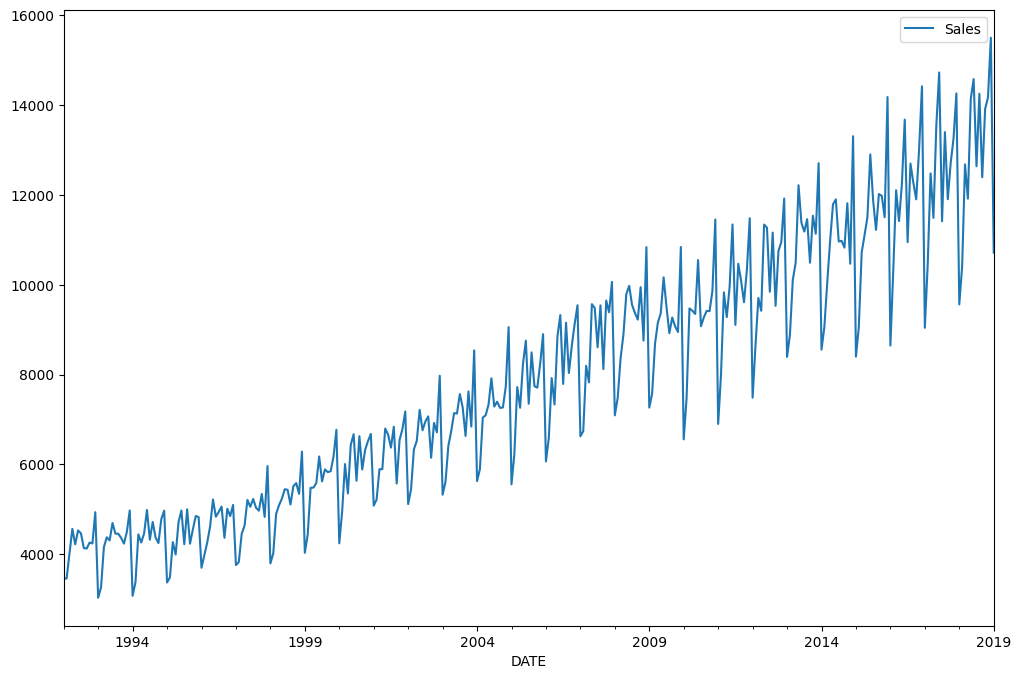

In [42]:
df.columns = ['Sales']
df.plot(figsize=(12,8))

In [43]:
df['Sale_LastMonth']=df['Sales'].shift(+1)
df['Sale_2Monthsback']=df['Sales'].shift(+2)
df['Sale_3Monthsback']=df['Sales'].shift(+3)
df

,Sales,Sale_LastMonth,Sale_2Monthsback,Sale_3Monthsback
DATE,,,,
1992-01-01,3459,NaN,NaN,NaN
1992-02-01,3458,3459.0,NaN,NaN
1992-03-01,4002,3458.0,3459.0,NaN
1992-04-01,4564,4002.0,3458.0,3459.0
1992-05-01,4221,4564.0,4002.0,3458.0
...,...,...,...,...
2018-09-01,12396,14257.0,12640.0,14583.0
2018-10-01,13914,12396.0,14257.0,12640.0
2018-11-01,14174,13914.0,12396.0,14257.0


In [44]:
df=df.dropna()
df

,Sales,Sale_LastMonth,Sale_2Monthsback,Sale_3Monthsback
DATE,,,,
1992-04-01,4564,4002.0,3458.0,3459.0
1992-05-01,4221,4564.0,4002.0,3458.0
1992-06-01,4529,4221.0,4564.0,4002.0
1992-07-01,4466,4529.0,4221.0,4564.0
1992-08-01,4137,4466.0,4529.0,4221.0
...,...,...,...,...
2018-09-01,12396,14257.0,12640.0,14583.0
2018-10-01,13914,12396.0,14257.0,12640.0
2018-11-01,14174,13914.0,12396.0,14257.0


##Linear Reression VS Random Forest Regression

In [45]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()

In [46]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,max_features=3, random_state=1)


In [47]:
import numpy as np
x1,x2,x3,y=df['Sale_LastMonth'],df['Sale_2Monthsback'],df['Sale_3Monthsback'],df['Sales']
x1,x2,x3,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)#converting all my datas into arrays
x1,x2,x3,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1) #converting all my datas into arrays two create the following three columns
final_x=np.concatenate((x1,x2,x3),axis=1)
print(final_x)

[[ 4002.  3458.  3459.]
 [ 4564.  4002.  3458.]
 [ 4221.  4564.  4002.]
 [ 4529.  4221.  4564.]
 [ 4466.  4529.  4221.]
 [ 4137.  4466.  4529.]
 [ 4126.  4137.  4466.]
 [ 4259.  4126.  4137.]
 [ 4240.  4259.  4126.]
 [ 4936.  4240.  4259.]
 [ 3031.  4936.  4240.]
 [ 3261.  3031.  4936.]
 [ 4160.  3261.  3031.]
 [ 4377.  4160.  3261.]
 [ 4307.  4377.  4160.]
 [ 4696.  4307.  4377.]
 [ 4458.  4696.  4307.]
 [ 4457.  4458.  4696.]
 [ 4364.  4457.  4458.]
 [ 4236.  4364.  4457.]
 [ 4500.  4236.  4364.]
 [ 4974.  4500.  4236.]
 [ 3075.  4974.  4500.]
 [ 3377.  3075.  4974.]
 [ 4443.  3377.  3075.]
 [ 4261.  4443.  3377.]
 [ 4460.  4261.  4443.]
 [ 4985.  4460.  4261.]
 [ 4324.  4985.  4460.]
 [ 4719.  4324.  4985.]
 [ 4374.  4719.  4324.]
 [ 4248.  4374.  4719.]
 [ 4784.  4248.  4374.]
 [ 4971.  4784.  4248.]
 [ 3370.  4971.  4784.]
 [ 3484.  3370.  4971.]
 [ 4269.  3484.  3370.]
 [ 3994.  4269.  3484.]
 [ 4715.  3994.  4269.]
 [ 4974.  4715.  3994.]
 [ 4223.  4974.  4715.]
 [ 5000.  4223. 

In [48]:
X_train,X_test,y_train,y_test=final_x[:-30],final_x[-30:],y[:-30],y[-30:] #train our Machine learning

In [49]:
model.fit(X_train,y_train)# for random forest model trained
lin_model.fit(X_train,y_train)# for linear regression model trained

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


LinearRegression()

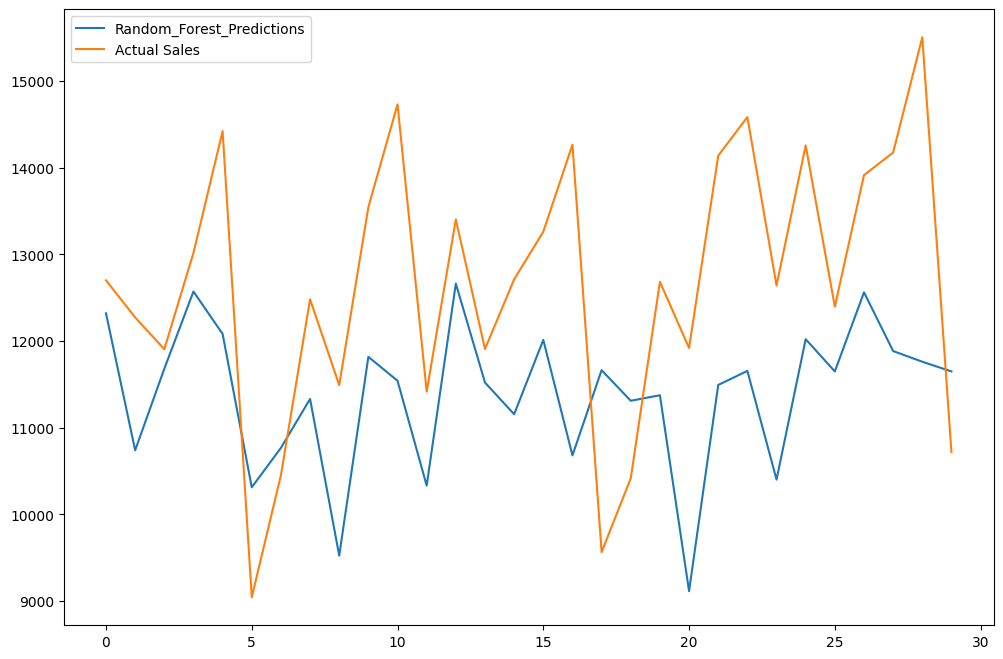

In [50]:
pred=model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred,label='Random_Forest_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

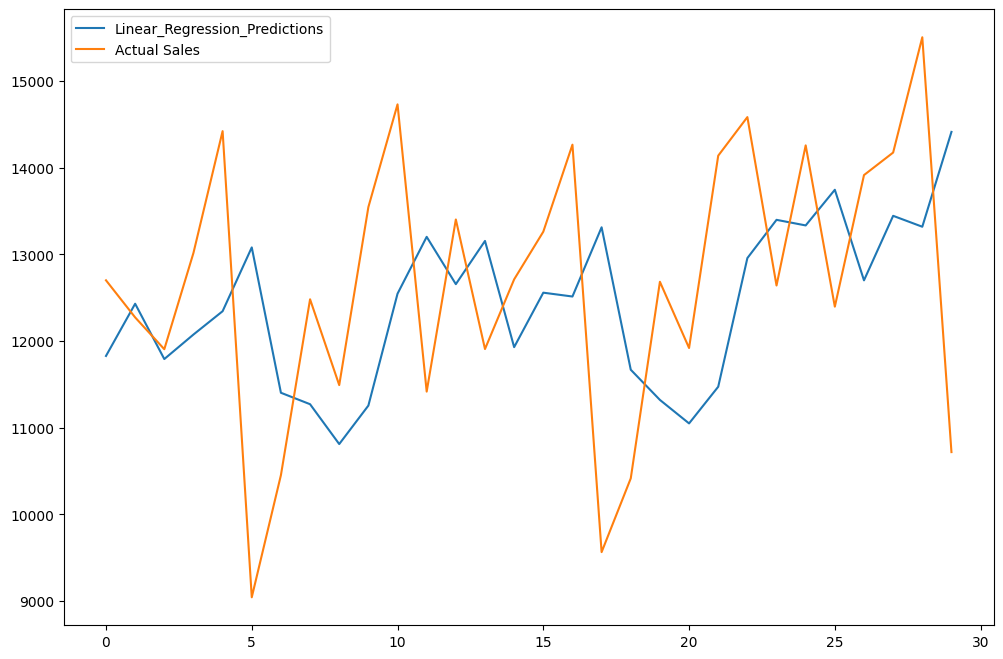

In [51]:
lin_pred=lin_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(lin_pred,label='Linear_Regression_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

In [52]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_rf=sqrt(mean_squared_error(pred,y_test))
rmse_lr=sqrt(mean_squared_error(lin_pred,y_test))

In [53]:
print('Mean Squared Error for Random Forest Model is:',rmse_rf)
print('Mean Squared Error for Linear Regression Model is:',rmse_lr)

Mean Squared Error for Random Forest Model is: 1913.7762399350665
Mean Squared Error for Linear Regression Model is: 1791.496523275983


### **SARIMA**

In [54]:
!pip  install pmdarima  #the library for SARIMA

In [55]:
from pmdarima import auto_arima

In [56]:
df =   pd.read_csv("/content/Alcohol_Sales.csv",
              index_col = "DATE",
              parse_dates = True) #.asfreq("D")
df.head()

,Sales
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [57]:
df.columns = ['Sales']

In [58]:
training = df.iloc[:-31,:]
test = df.iloc[-31:, :]

In [59]:
model = auto_arima(y = training.Sales,
                   m = 7)

In [60]:
predictions = pd.Series(model.predict(n_periods = len(test)))
predictions.index = test.index
predictions[:30]

,0
DATE,
2016-07-01,11113.683211
2016-08-01,12146.521666
2016-09-01,11759.401145
2016-10-01,11901.549687
2016-11-01,11875.337690
2016-12-01,11720.801296
2017-01-01,11507.885783
2017-02-01,11512.897858
2017-03-01,12338.437887


<Axes: xlabel='DATE'>

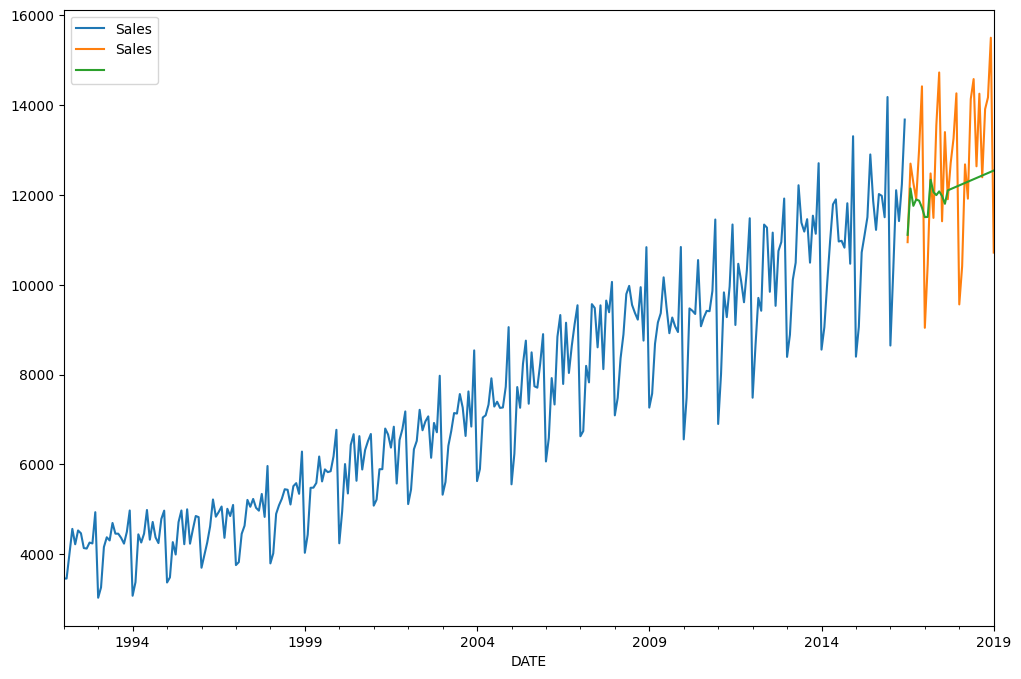

In [61]:
#Visualization

training['Sales'].plot(figsize = (12,8), legend = True) #['2017-12-01':]
test['Sales'].plot( legend = True)
predictions.plot(legend = True)

### Seasonal Trend Decomposition (STL)

In [62]:
!pip install statsmodels pandas matplotlib

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

df = pd.read_csv("Alcohol_Sales.csv")
df.head(10), df.dtypes


(        DATE  Sales
 0   1/1/1992   3459
 1   2/1/1992   3458
 2   3/1/1992   4002
 3   4/1/1992   4564
 4   5/1/1992   4221
 5   6/1/1992   4529
 6   7/1/1992   4466
 7   8/1/1992   4137
 8   9/1/1992   4126
 9  10/1/1992   4259,
 DATE     object
 Sales     int64
 dtype: object)

In [69]:
df['DATE'] =pd.to_datetime(df['DATE'])
df = df.set_index('DATE')
ts = df['Sales']

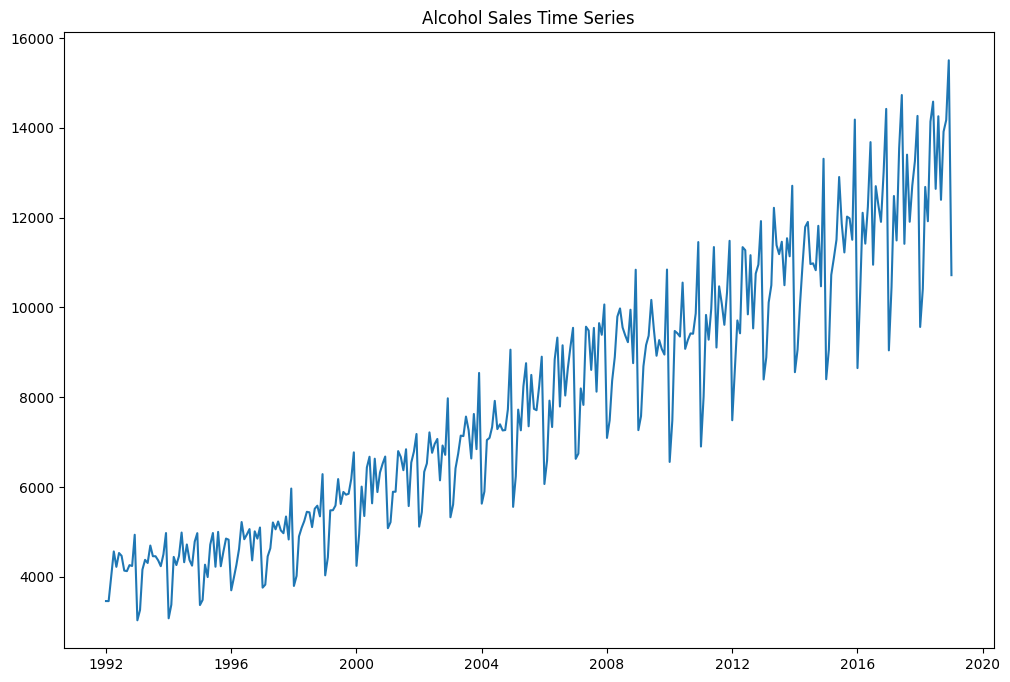

In [70]:
plt.figure(figsize=(12,8))
plt.plot(ts)
plt.title("Alcohol Sales Time Series")
plt.show()

In [72]:
stl = STL(ts, period=12, robust=True)
res = stl.fit()


 **
*   Trend (long-term behavior)
*   Seasonal (repeating yearly pattern)
*   Residual (noise/anomalies)**








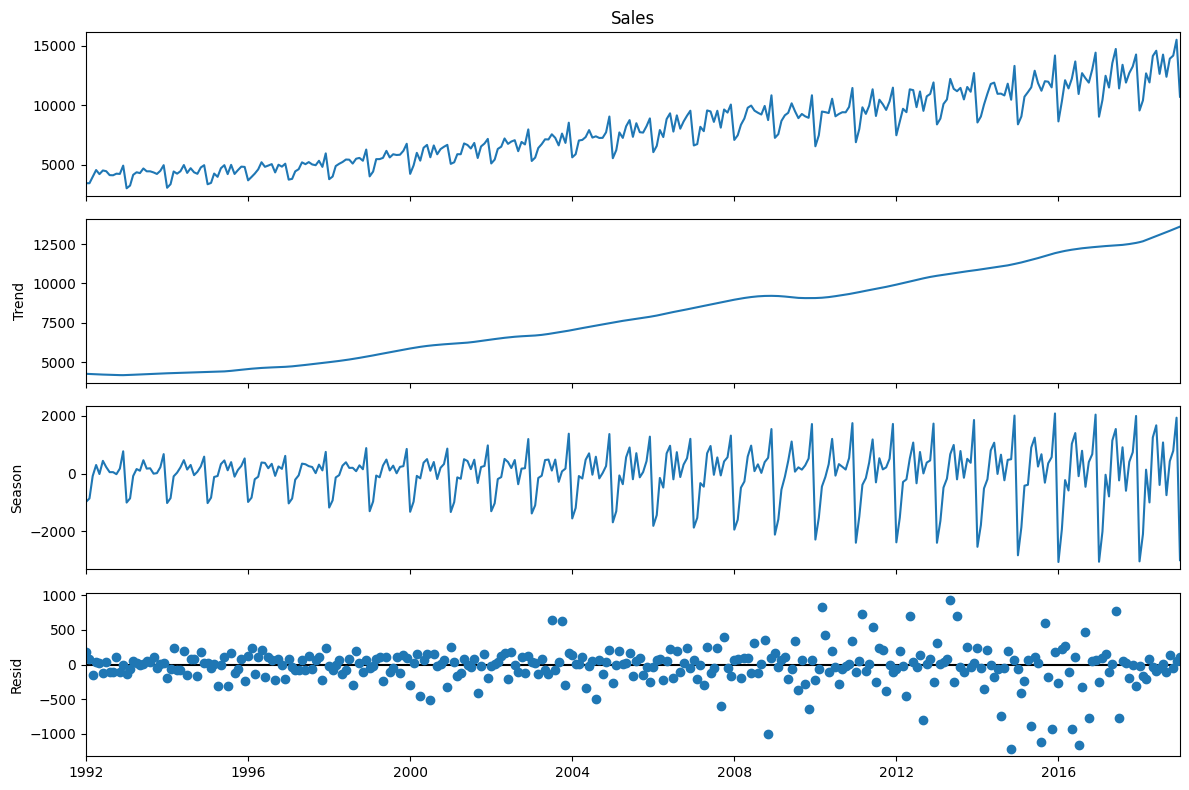

In [74]:
res.plot()
plt.show()

Detect **Anomalies**

In [75]:
resid = res.resid
threshold = 3 * resid.std()
anomalies = resid[abs(resid) > threshold]
anomalies

,resid
DATE,
2008-11-01,-997.751969
2010-03-01,833.375890
2013-05-01,926.463233
2014-11-01,-1215.761174
2015-05-01,-881.154027
2015-08-01,-1118.106721
2015-11-01,-928.002784
2016-05-01,-933.646814
2016-07-01,-1165.928932


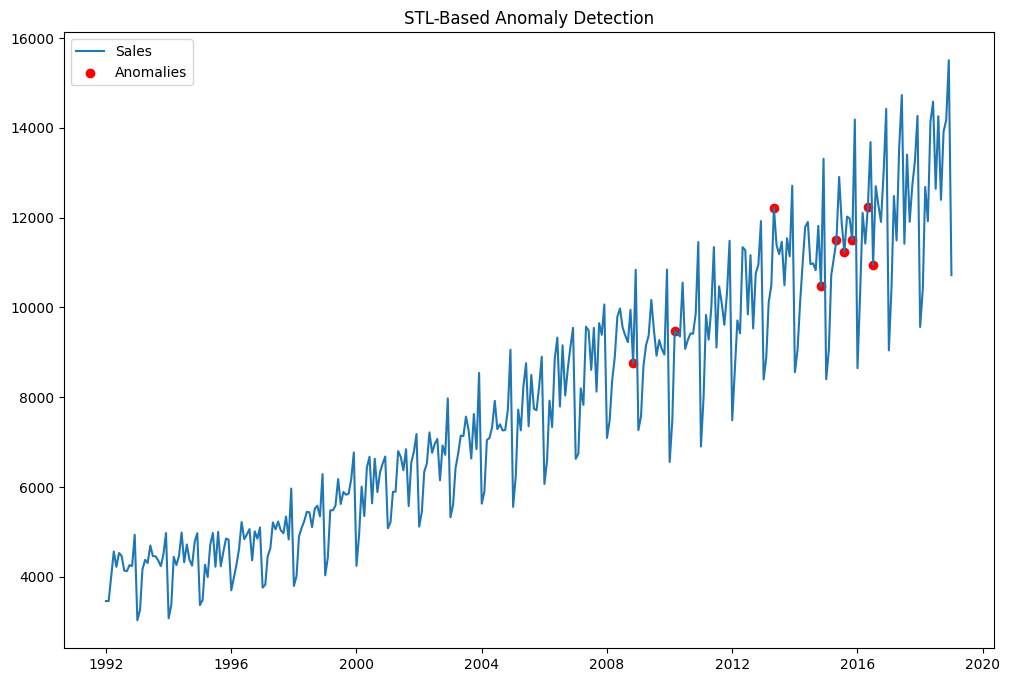

In [80]:
plt.figure(figsize=(12,8))
plt.plot(ts, label='Sales')
plt.scatter(anomalies.index, ts.loc[anomalies.index], color="red", label="Anomalies")
plt.legend()
plt.title('STL-Based Anomaly Detection')
plt.show()

**Behavioral/structural anomalies (seasonal)**

In [81]:
trend = res.trend
seasonal = res.seasonal
residual = res.resid

**Seasonal Anomaly Detection**

In [87]:
seasonal_mean = seasonal.groupby(seasonal.index.month).transform('mean')
seasonal_std  = seasonal.groupby(seasonal.index.month).transform('std')

seasonal_anom = seasonal[abs(seasonal - seasonal_mean) > 3 * seasonal_std]
seasonal_anom


,season
DATE,


**Residual Anomaly Detection**

In [86]:
residual_anom = residual[abs(residual) > 3 * residual.std()]
residual_anom

,resid
DATE,
2008-11-01,-997.751969
2010-03-01,833.375890
2013-05-01,926.463233
2014-11-01,-1215.761174
2015-05-01,-881.154027
2015-08-01,-1118.106721
2015-11-01,-928.002784
2016-05-01,-933.646814
2016-07-01,-1165.928932


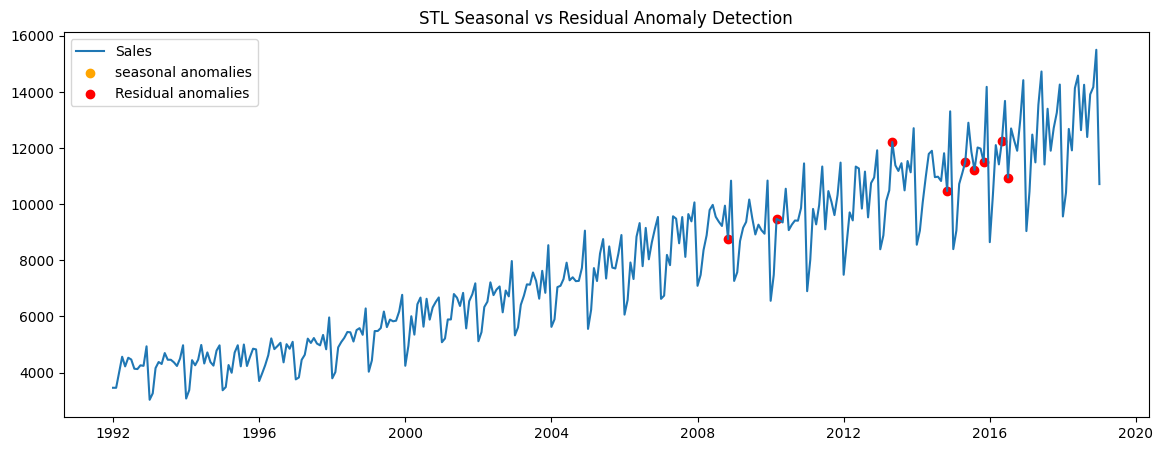

In [90]:
plt.figure(figsize=(14,5))
plt.plot(ts, label="Sales")

plt.scatter(seasonal_anom.index, ts.loc[seasonal_anom.index], color="orange",label="seasonal anomalies")
plt.scatter(residual_anom.index, ts.loc[residual_anom.index],color="red",label="Residual anomalies")

plt.legend()
plt.title("STL Seasonal vs Residual Anomaly Detection")
plt.show()

**Seasonal Control Bands (Behavioral Drift)**

**control-band STL anomaly model**

In [93]:
mu_s = seasonal.mean()
sigma_s = seasonal.std()

k = 3
UCL_s = mu_s + k * sigma_s
LCL_s = mu_s - k * sigma_s

seasonal_anom = seasonal[(seasonal > UCL_s) | (seasonal < LCL_s)]

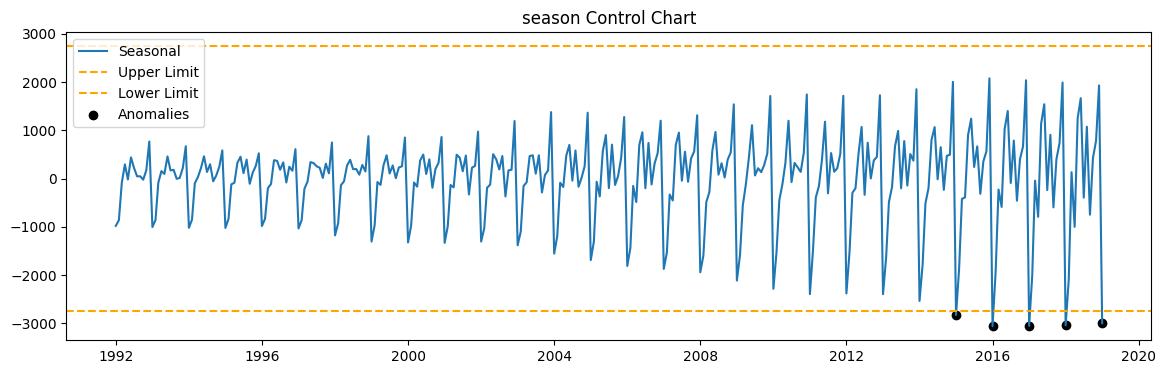

In [97]:
plt.figure(figsize=(14,4))
plt.plot(seasonal, label="Seasonal")
plt.axhline(UCL_s, color='orange', linestyle='--', label="Upper Limit")
plt.axhline(LCL_s, color='orange', linestyle='--', label="Lower Limit")
plt.scatter(seasonal_anom.index, seasonal_anom, color="black", label="Anomalies")
plt.legend()
plt.title("season Control Chart")
plt.show()

**Residual Control Bands (Shock Anomalies)**

In [100]:
mu_r = residual.mean()
sigma_r = residual.std()

k = 2
UCL_r = mu_r + k * sigma_r
LCL_r = mu_r + k * sigma_s

residual_anom = residual[(residual > UCL_r) | (residual < LCL_r)]

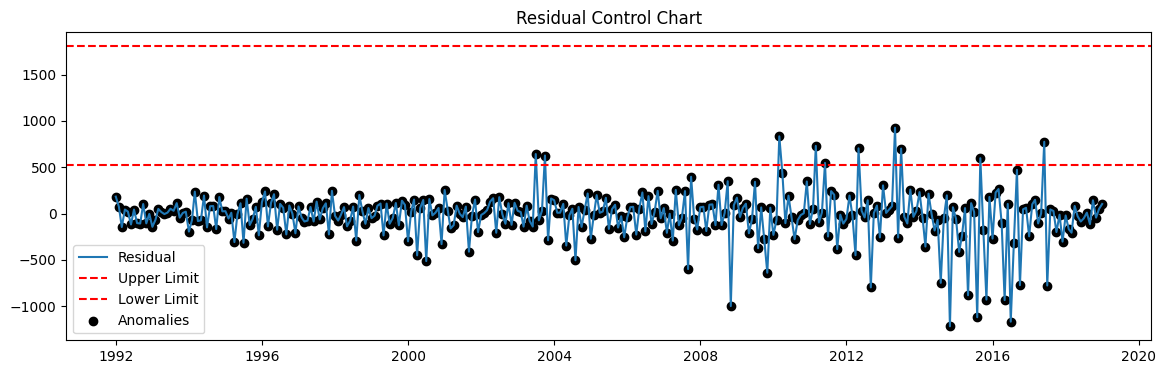

In [101]:
plt.figure(figsize=(14,4))
plt.plot(residual, label="Residual")
plt.axhline(UCL_r, color='red', linestyle='--', label="Upper Limit")
plt.axhline(LCL_r, color='red', linestyle='--', label="Lower Limit")
plt.scatter(residual_anom.index, residual_anom, color="black", label="Anomalies")
plt.legend()
plt.title("Residual Control Chart")
plt.show()

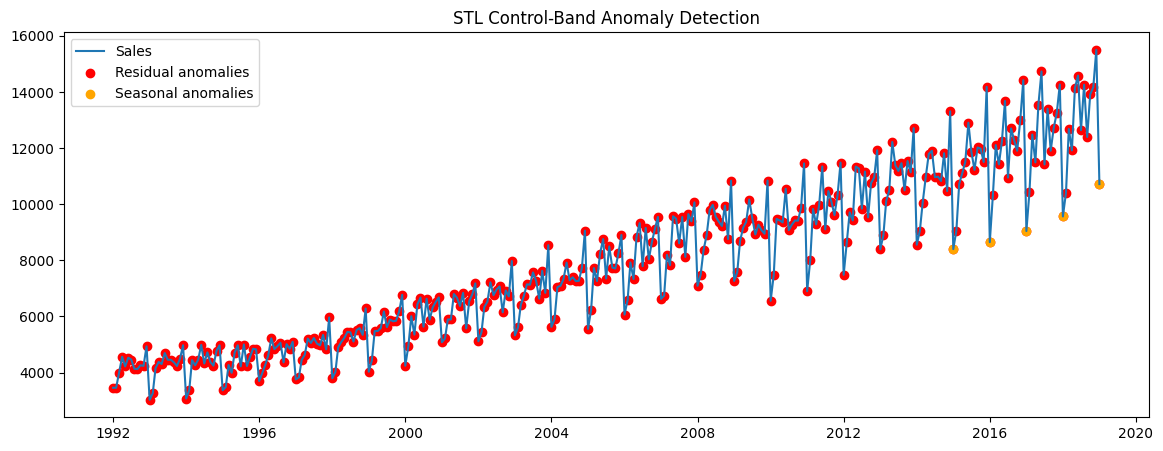

In [102]:
plt.figure(figsize=(14,5))
plt.plot(ts, label="Sales")

plt.scatter(residual_anom.index, ts.loc[residual_anom.index],
            color="red", label="Residual anomalies")

plt.scatter(seasonal_anom.index, ts.loc[seasonal_anom.index],
            color="orange", label="Seasonal anomalies")

plt.legend()
plt.title("STL Control-Band Anomaly Detection")
plt.show()


**Alarm scoring system**

In [105]:
seasonal_score = ((abs(seasonal) - k*sigma_s) / sigma_s).clip(lower=0)
residual_score = ((abs(residual) - k*sigma_r) / sigma_r).clip(lower=0)

In [106]:
total_score = residual_score + seasonal_score


In [107]:
def alarm_level(score):
    if score >= 3: return "CRITICAL"
    elif score >= 2: return "HIGH"
    elif score >= 1: return "MEDIUM"
    elif score > 0: return "LOW"
    else: return "NORMAL"

alarm = total_score.apply(alarm_level)


In [108]:
alarm_df = pd.DataFrame({
    "Sales": ts,
    "ResidualScore": residual_score,
    "SeasonalScore": seasonal_score,
    "TotalScore": total_score,
    "AlarmLevel": alarm
})

alarm_df[alarm_df.TotalScore > 0].head(10)


,Sales,ResidualScore,SeasonalScore,TotalScore,AlarmLevel
DATE,,,,,
2003-07-01,7568,0.364979,0.000000,0.364979,LOW
2003-10-01,7626,0.307242,0.000000,0.307242,LOW
2007-01-01,6627,0.000000,0.047137,0.047137,LOW
2007-09-01,8123,0.204022,0.000000,0.204022,LOW
2008-01-01,7093,0.000000,0.123656,0.123656,LOW
2008-11-01,8758,1.674328,0.000000,1.674328,MEDIUM
2009-01-01,7266,0.000000,0.311622,0.311622,LOW
2009-11-01,8949,0.349577,0.000000,0.349577,LOW
2010-01-01,6558,0.000000,0.498445,0.498445,LOW


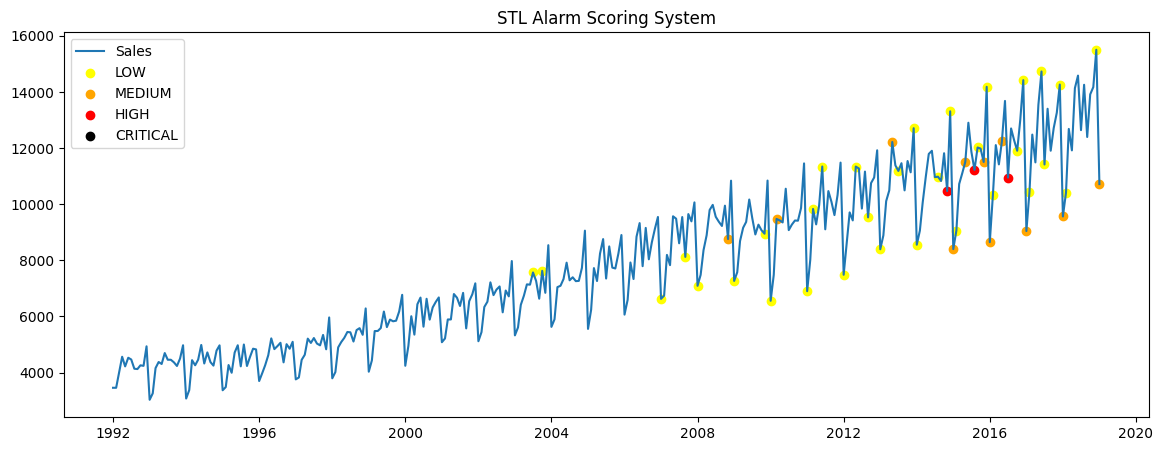

In [109]:
plt.figure(figsize=(14,5))
plt.plot(ts, label="Sales")

plt.scatter(alarm_df[alarm=="LOW"].index,
            ts.loc[alarm=="LOW"], color="yellow", label="LOW")

plt.scatter(alarm_df[alarm=="MEDIUM"].index,
            ts.loc[alarm=="MEDIUM"], color="orange", label="MEDIUM")

plt.scatter(alarm_df[alarm=="HIGH"].index,
            ts.loc[alarm=="HIGH"], color="red", label="HIGH")

plt.scatter(alarm_df[alarm=="CRITICAL"].index,
            ts.loc[alarm=="CRITICAL"], color="black", label="CRITICAL")

plt.legend()
plt.title("STL Alarm Scoring System")
plt.show()


**ARIMA**

In [110]:
clean_ts = ts.copy()
clean_ts.loc[alarm_df.TotalScore > 0] = None
clean_ts = clean_ts.interpolate()


**Fit Seasonal ARIMA**

In [111]:
from pmdarima import auto_arima

model = auto_arima(
    clean_ts,
    seasonal=True,
    m=12,
    suppress_warnings=True,
    stepwise=True
)


/usr/local/lib/python3.12/dist-packages/pmdarima/arima/_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(2,1,0)(2,0,1)[12] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/pmdarima/arima/_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/pmdarima/arima/arima.py", line 610, in fit
    self._fit(y, X, **fit_args)
  File "/usr/local/lib/python3.12/dist-packages/pmdarima/arima/arima.py", line 531, in _fit
    fit, self.arima_res_ = _fit_wrapper()
                           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pmdarima/arima/arima.py", line 517, in _fit_wrapper
    fitted = arima.fit(
             ^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/mlemodel.py", line 705, in fit
    mlefit = super().fit(start_p

**Forecast next 12 months**

In [112]:
forecast, confint = model.predict(n_periods=12, return_conf_int=True)

future_idx = pd.date_range(ts.index[-1] + pd.offsets.MonthBegin(),
                           periods=12, freq='MS')


**Plot**

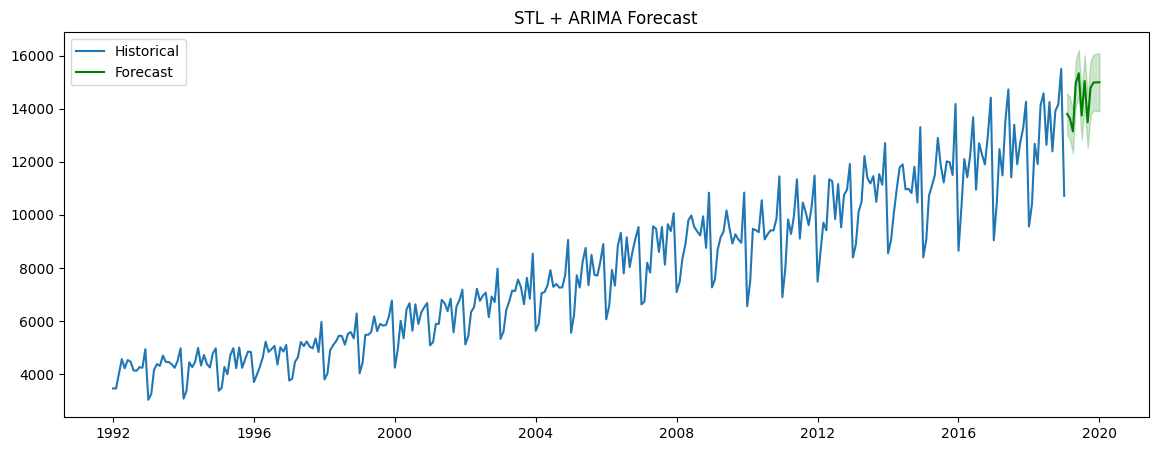

In [113]:
plt.figure(figsize=(14,5))
plt.plot(ts, label="Historical")

plt.plot(future_idx, forecast, label="Forecast", color="green")
plt.fill_between(future_idx, confint[:,0], confint[:,1], color='green', alpha=0.2)

plt.legend()
plt.title("STL + ARIMA Forecast")
plt.show()


**Forecast alarm detection (early warning)**

In [114]:
future_residual = forecast - model.predict_in_sample()[-12:].mean()
future_alarm_score = (abs(future_residual) - k*sigma_r)/sigma_r
future_alarm_score = future_alarm_score.clip(lower=0)
future_alarm_score


,0
2019-02-01,0.022907
2019-03-01,0.000000
2019-04-01,0.000000
2019-05-01,4.254705
2019-06-01,5.689007
2019-07-01,0.000000
2019-08-01,4.603491
2019-09-01,0.000000
2019-10-01,3.648218
2019-11-01,4.396854


**Prepare anomaly-cleaned signal**

In [115]:
clean_ts = ts.copy()
clean_ts.loc[alarm_df.TotalScore > 0] = None
clean_ts = clean_ts.interpolate()

**Normalize**

In [116]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled = scaler.fit_transform(clean_ts.values.reshape(-1,1))


**Build LSTM(Long Short-Term Memory) sequences**

In [117]:
def make_seq(data, win=24):
    X, y = [], []
    for i in range(len(data)-win):
        X.append(data[i:i+win])
        y.append(data[i+win])
    return np.array(X), np.array(y)

X, y = make_seq(scaled, win=24)


**Train/Test split**

In [118]:
split = int(0.85 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [119]:
# Building LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(24,1)),
    LSTM(32),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=40, batch_size=16, validation_data=(X_test, y_test))


Epoch 1/40


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0879 - val_loss: 0.0247
Epoch 2/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0083 - val_loss: 0.0031
Epoch 3/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0067 - val_loss: 0.0046
Epoch 4/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0044 - val_loss: 0.0109
Epoch 5/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0050 - val_loss: 0.0040
Epoch 6/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0041 - val_loss: 0.0043
Epoch 7/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0048 - val_loss: 0.0102
Epoch 8/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0048 - val_loss: 0.0038
Epoch 9/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0048 - val_loss: 0.0048
Epoch 10/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0043 - val_loss: 0.0040
Epoch 11/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0049 - val_loss: 0.0054
Epoch 12/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0048 - val_l

In [120]:
history = scaled[-24:]
future = []

for _ in range(12):
    pred = model.predict(history.reshape(1,24,1))[0,0]
    future.append(pred)
    history = np.append(history[1:], [[pred]], axis=0)

future = scaler.inverse_transform(np.array(future).reshape(-1,1)).ravel()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 870ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


**PLOT LSTM forcast**

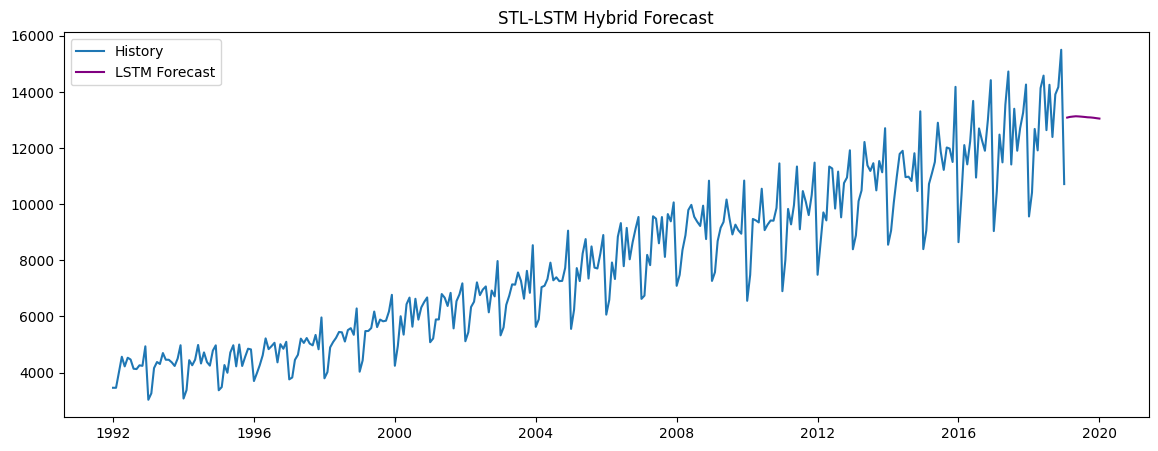

In [121]:
plt.figure(figsize=(14,5))
plt.plot(ts, label="History")
plt.plot(future_idx, future, label="LSTM Forecast", color="purple")
plt.legend()
plt.title("STL-LSTM Hybrid Forecast")
plt.show()


**LSTM Early-Warning Anomaly Detection**

In [122]:
residual_future = future - ts[-12:].mean()
future_alarm = (abs(residual_future) - k*sigma_r)/sigma_r
future_alarm = np.clip(future_alarm,0,None)
future_alarm


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

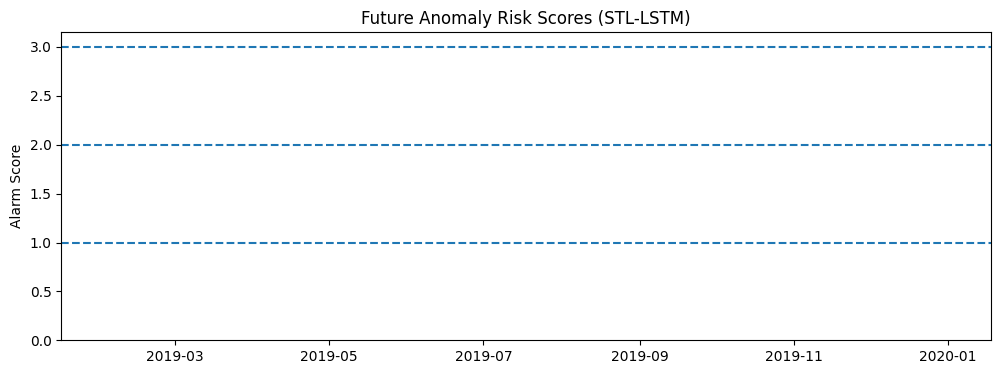

In [123]:
plt.figure(figsize=(12,4))
plt.bar(future_idx, future_alarm)
plt.axhline(1, linestyle="--")
plt.axhline(2, linestyle="--")
plt.axhline(3, linestyle="--")
plt.title("Future Anomaly Risk Scores (STL-LSTM)")
plt.ylabel("Alarm Score")
plt.show()
